In [0]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
from tempfile import TemporaryFile
import csv
import numpy as np
from skimage.transform import resize
from PIL import Image
import matplotlib.pyplot as plt
from __future__ import absolute_import, division, print_function, unicode_literals
import matplotlib.pyplot as plt
import cv2

In [0]:
X = np.load('/content/gdrive/My Drive/LED_cropped_75_75_3_numpy_data_.npy') 
Y = np.load('/content/gdrive/My Drive/labels_3_levels_balanced.npy')

In [0]:
print(X.shape)
print(X)

(7393, 75, 75, 3)
[[[[191. 199. 184.]
   [191. 199. 184.]
   [193. 199. 185.]
   ...
   [211. 208. 199.]
   [210. 210. 200.]
   [210. 210. 200.]]

  [[191. 199. 184.]
   [191. 199. 184.]
   [193. 199. 185.]
   ...
   [211. 208. 199.]
   [210. 210. 200.]
   [210. 210. 200.]]

  [[192. 198. 184.]
   [192. 198. 184.]
   [193. 199. 185.]
   ...
   [205. 202. 193.]
   [203. 203. 193.]
   [203. 203. 193.]]

  ...

  [[165. 165. 157.]
   [165. 165. 157.]
   [167. 167. 159.]
   ...
   [164. 165. 157.]
   [167. 170. 161.]
   [167. 170. 161.]]

  [[162. 165. 158.]
   [162. 165. 158.]
   [142. 145. 138.]
   ...
   [164. 165. 157.]
   [165. 171. 161.]
   [165. 171. 161.]]

  [[162. 165. 158.]
   [162. 165. 158.]
   [142. 145. 138.]
   ...
   [164. 165. 157.]
   [165. 171. 161.]
   [165. 171. 161.]]]


 [[[205. 209. 195.]
   [205. 209. 195.]
   [205. 209. 195.]
   ...
   [205. 211. 197.]
   [203. 209. 195.]
   [203. 209. 195.]]

  [[205. 209. 195.]
   [205. 209. 195.]
   [205. 209. 195.]
   ...
   

In [0]:
print(Y.shape)
print(Y)

(7393, 3)
[[1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 ...
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]]


In [0]:
from sklearn.utils import shuffle
X, Y = shuffle(X, Y, random_state=0)

In [0]:
x_train = X[:6393]
y_train = Y[:6393]
print(x_train.shape)
print(y_train.shape)

(6393, 75, 75, 3)
(6393, 3)


In [0]:
x_val = X[6393:6893]
y_val = Y[6393:6893]
print(x_val.shape)
print(y_val.shape)

(500, 75, 75, 3)
(500, 3)


In [0]:
x_test = X[6893:]
y_test = Y[6893:]
print(x_test.shape)
print(y_test.shape)

(500, 75, 75, 3)
(500, 3)


(75, 75, 3)


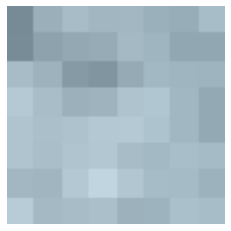

[0. 0. 1.]


In [0]:
# picking a test sample before generating adversarial examples 
Image = x_test[ 0, :]
print( Image.shape )
r,g,b = cv2.split(Image)       # get b,g,r
Image = cv2.merge([r,g,b])

plt.imshow( Image.astype('uint8') )
plt.axis( 'off' )
plt.show( )
print(y_test[2])

In [0]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix

In [0]:
import glob
import numpy as np
import pandas as pd
import os
import shutil 
import matplotlib.pyplot as plt
from keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array, array_to_img
%matplotlib inline

Using TensorFlow backend.


In [0]:
from keras.applications.inception_v3 import InceptionV3
from keras.models import Model
import keras
inception = InceptionV3(include_top=False, weights='imagenet', input_shape=(75,75,3))
output = inception.layers[-1].output
output = keras.layers.Flatten()(output)
inception = Model(inception.input, output=output)
for layer in inception.layers:
    layer.trainable = False
inception.summary()

87916544/87910968 [==============================] - 7s 0us/step
Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 75, 75, 3)    0                                            
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 37, 37, 32)   864         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization_1 (BatchNor (None, 37, 37, 32)   96          conv2d_1[0][0]                   
__________________________________________________________________________________________________
activation_1 (Activation)       (None, 37, 37, 32)   0           batch_normalization_1[0][0]      
___________________________

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: UserWarning: Update your `Model` call to the Keras 2 API: `Model(Tensor("in..., outputs=Tensor("fl...)`
  import sys


In [0]:
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, InputLayer
from keras.models import Sequential
from keras import optimizers
from keras.regularizers import l2
model_Sigmoid = Sequential()
model_Sigmoid.add(inception)
model_Sigmoid.add(Dense(512, activation='relu', input_dim=(75,75,3), kernel_regularizer=l2(0.001)))
model_Sigmoid.add(Dropout(0.2))
model_Sigmoid.add(Dense(512, activation='relu', kernel_regularizer=l2(0.001)))
model_Sigmoid.add(Dropout(0.2))
model_Sigmoid.add(Dense(3, activation='sigmoid'))
model_Sigmoid.compile(loss='categorical_crossentropy',
              optimizer=optimizers.Adam(lr=0.0001),
              metrics=['accuracy'])
model_Sigmoid.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
model_1 (Model)              (None, 2048)              21802784  
_________________________________________________________________
dense_1 (Dense)              (None, 512)               1049088   
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 512)               262656    
_________________________________________________________________
dropout_2 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 3)                 1539      
Total params: 23,116,067
Trainable params: 1,313,283
Non-trainable params: 21,802,784
__________________________________

In [0]:
# RMSprop ###(lr = 0.001 -> [32.48N, 25.40N, 16.5N])Overfitting###(lr = 0.0001 -> [32.82N, 32.82N, 32.82N])Overfitting###(lr = 0.00001 -> [32.82N, 32,82N, 32.82N])Overfitting###
# Adam ###(lr = 0.001 -> [26.70, 22.69N, 3.75N])Overfitting###(lr = 0.0001 -> [32.82N, 32.82N, 32.82N])Overfittin###(lr = 0.00001 -> [32.82N, 32.82N, 32.82N])Overfitting###
# SGD ###(lr = 0.001 -> [27.93UN, 32.77N, 32.82N])###(lr = 0.0001 -> [27.38N, 27.83N, 32.82N])###(lr = 0.00001 -> [33.30N, 32.82N, 33.73N])###
# N = No learning, GG = Great Learning, OG = Okay Learning, U = Unlearning

#SGD lr = 0.001       ### (75 x 75 x 3) 32.82% (ANY, lr = ANY, f1= 0.164753) ###

model_Sigmoid.fit(x_train, y_train, batch_size=64, epochs=10, validation_data=(x_val, y_val))

Train on 6393 samples, validate on 500 samples
Epoch 1/10
6393/6393 [==============================] - 16s 3ms/step - loss: 2.2555 - accuracy: 0.5234 - val_loss: 1.2072 - val_accuracy: 0.3380
Epoch 2/10
6393/6393 [==============================] - 4s 618us/step - loss: 1.8708 - accuracy: 0.7198 - val_loss: 1.1332 - val_accuracy: 0.3380
Epoch 3/10
6393/6393 [==============================] - 4s 603us/step - loss: 1.7129 - accuracy: 0.7569 - val_loss: 1.0759 - val_accuracy: 0.3380
Epoch 4/10
6393/6393 [==============================] - 4s 620us/step - loss: 1.6191 - accuracy: 0.7738 - val_loss: 1.0276 - val_accuracy: 0.3380
Epoch 5/10
6393/6393 [==============================] - 4s 629us/step - loss: 1.5494 - accuracy: 0.7802 - val_loss: 0.9858 - val_accuracy: 0.3380
Epoch 6/10
6393/6393 [==============================] - 4s 604us/step - loss: 1.4798 - accuracy: 0.7962 - val_loss: 0.9483 - val_accuracy: 0.3380
Epoch 7/10
6393/6393 [==============================] - 4s 595us/step - loss: 

In [0]:
model_Sigmoid.evaluate(x_test, y_test)

500/500 [==============================] - 1s 2ms/step


[0.8263127207756042, 0.3160000145435333]

In [0]:
# predict probabilities for test set
yhat_probs_Sigmoid = model_Sigmoid.predict(x_test, verbose=0)
# predict crisp classes for test set
yhat_classes_Sigmoid = model_Sigmoid.predict_classes(x_test, verbose=0)
yhat_probs_Sigmoid = np.argmax(yhat_probs_Sigmoid, axis=1)
print(yhat_probs_Sigmoid.shape)
print(yhat_classes_Sigmoid.shape)

(500,)
(500,)


In [0]:
print(y_test.shape)
y_test_Sigmoid = np.argmax(y_test, axis=1)
print(y_test_Sigmoid.shape)

(500, 3)
(500,)


In [0]:
# accuracy: (tp + tn) / (p + n)
accuracy_Sigmoid = accuracy_score(y_test_Sigmoid, yhat_classes_Sigmoid)
print('Accuracy Sigmoid: %f' % accuracy_Sigmoid)
# precision tp / (tp + fp)
precision_Sigmoid = precision_score(y_test_Sigmoid, yhat_classes_Sigmoid, average='macro')
print('Precision Sigmoid: %f' % precision_Sigmoid)
# recall: tp / (tp + fn)
recall_Sigmoid = recall_score(y_test_Sigmoid, yhat_classes_Sigmoid, average='macro')
print('Recall Sigmoid: %f' % recall_Sigmoid)
# f1: 2 tp / (2 tp + fp + fn)
f1_Sigmoid = f1_score(y_test_Sigmoid, yhat_classes_Sigmoid, average='macro')
print('F1 score Sigmoid: %f' % f1_Sigmoid)

Accuracy Sigmoid: 0.316000
Precision Sigmoid: 0.105333
Recall Sigmoid: 0.333333
F1 score Sigmoid: 0.160081


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [0]:
model_Softmax = Sequential()
model_Softmax.add(inception)
model_Softmax.add(Dense(512, activation='relu', input_dim=(75,75,3), kernel_regularizer=l2(0.001)))
model_Softmax.add(Dropout(0.2))
model_Softmax.add(Dense(512, activation='relu', kernel_regularizer=l2(0.001)))
model_Softmax.add(Dropout(0.2))
model_Softmax.add(Dense(3, activation='softmax'))
model_Softmax.compile(loss='categorical_crossentropy',
              optimizer=optimizers.Adam(lr=0.0001),
              metrics=['accuracy'])
model_Softmax.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
model_1 (Model)              (None, 2048)              21802784  
_________________________________________________________________
dense_4 (Dense)              (None, 512)               1049088   
_________________________________________________________________
dropout_3 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 512)               262656    
_________________________________________________________________
dropout_4 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 3)                 1539      
Total params: 23,116,067
Trainable params: 1,313,283
Non-trainable params: 21,802,784
__________________________________

In [0]:
# RMSprop ###(lr = 0.001 -> [30.48N, 24.06N, 30.84N])Overfitting###(lr = 0.0001 -> [29.09N, 20.73N, 19.5N])Overfitting###(lr = 0.00001 -> [32.23N, 20.73N, 31.75N])Overfitting###
# Adam ###(lr = 0.001 -> [26.67N, 29.79N, 16.86N])Overfitting###(lr = 0.0001 -> [29.25N, 29.11N, 24.31N])Overfitting###(lr = 0.00001 -> [34.23N, 21.98N, 32.73N])Overfitting###
# SGD ###(lr = 0.001 -> [49.87OG, 32.66N, 30.50N])###(lr = 0.0001 -> [33.43N, 32.55N, 32.80N])###(lr = 0.00001 -> [33.32N, 34.71N, 14.77N])###
# N = No learning, GG = Great Learning, OG = Okay Learning, U = Unlearning

#RMSprop lr = 0.00001       ### (75 x 75 x 3) 32.23% (ANY, lr = ANY, f1 = 0.162506) ###

model_Softmax.fit(x_train, y_train, batch_size=64, epochs=10, validation_data=(x_val, y_val))

Train on 6393 samples, validate on 500 samples
Epoch 1/10
6393/6393 [==============================] - 9s 1ms/step - loss: 2.2707 - accuracy: 0.5264 - val_loss: 46.5176 - val_accuracy: 0.3100
Epoch 2/10
6393/6393 [==============================] - 4s 598us/step - loss: 1.9439 - accuracy: 0.7081 - val_loss: 37.9450 - val_accuracy: 0.3240
Epoch 3/10
6393/6393 [==============================] - 4s 614us/step - loss: 1.7660 - accuracy: 0.7560 - val_loss: 48.1086 - val_accuracy: 0.3640
Epoch 4/10
6393/6393 [==============================] - 4s 603us/step - loss: 1.6792 - accuracy: 0.7691 - val_loss: 89.4556 - val_accuracy: 0.2040
Epoch 5/10
6393/6393 [==============================] - 4s 602us/step - loss: 1.5834 - accuracy: 0.7860 - val_loss: 116.2020 - val_accuracy: 0.3000
Epoch 6/10
6393/6393 [==============================] - 4s 611us/step - loss: 1.5301 - accuracy: 0.7959 - val_loss: 172.8361 - val_accuracy: 0.2320
Epoch 7/10
6393/6393 [==============================] - 4s 600us/step -

In [0]:
model_Softmax.evaluate(x_test, y_test)

500/500 [==============================] - 1s 1ms/step


[303.15007958984376, 0.2759999930858612]

In [0]:
# predict probabilities for test set
yhat_probs_Softmax = model_Softmax.predict(x_test, verbose=0)
# predict crisp classes for test set
yhat_classes_Softmax = model_Softmax.predict_classes(x_test, verbose=0)
yhat_probs_Softmax = np.argmax(yhat_probs_Softmax, axis=1)
print(yhat_probs_Softmax.shape)
print(yhat_classes_Softmax.shape)

(500,)
(500,)


In [0]:
print(y_test.shape)
y_test_Softmax = np.argmax(y_test, axis=1)
print(y_test_Softmax.shape)

(500, 3)
(500,)


In [0]:
# accuracy: (tp + tn) / (p + n)
accuracy_Softmax = accuracy_score(y_test_Softmax, yhat_classes_Softmax)
print('Accuracy Softmax: %f' % accuracy_Softmax)
# precision tp / (tp + fp)
precision_Softmax = precision_score(y_test_Softmax, yhat_classes_Softmax, average='macro')
print('Precision Softmax: %f' % precision_Softmax)
# recall: tp / (tp + fn)
recall_Softmax = recall_score(y_test_Softmax, yhat_classes_Softmax, average='macro')
print('Recall Softmax: %f' % recall_Softmax)
# f1: 2 tp / (2 tp + fp + fn)
f1_Softmax = f1_score(y_test_Softmax, yhat_classes_Softmax, average='macro')
print('F1 score Softmax: %f' % f1_Softmax)

Accuracy Softmax: 0.276000
Precision Softmax: 0.095833
Recall Softmax: 0.291139
F1 score Softmax: 0.144201
